<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/arboles_decision_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARBOLES DE DECISION EN PYTHON.

**El índice de Gini** es una medida de impureza en un conjunto de datos utilizado en el contexto de árboles de decisión y otros algoritmos de aprendizaje automático. En el contexto de los árboles de decisión, se utiliza para evaluar qué tan bien se dividen los datos en los nodos del árbol.

El índice de Gini se calcula de la siguiente manera:

$ Gini(t) = 1 - \sum_{i=1}^{c} (p_i)^2 $

Donde:
- \( t \) es el nodo que se está evaluando.
- \( c \) es el número de clases en el conjunto de datos.
- \( p_i \) es la proporción de instancias de la clase \( i \) en el nodo \( t \).

El índice de Gini alcanza su valor mínimo (0) cuando todas las instancias de un nodo pertenecen a una sola clase (es decir, el nodo es puro). Alcanza su valor máximo (1) cuando las instancias se distribuyen uniformemente en todas las clases (es decir, el nodo es impuro).

Cuando construimos un árbol de decisión, el algoritmo busca las divisiones que minimizan el índice de Gini en los nodos internos. En otras palabras, busca divisiones que hagan que los nodos resultantes sean lo más puros posible en términos de la clase objetivo.

En la visualización del árbol de decisión, el índice de Gini se muestra en algunos de los nodos internos. Si ves un nodo con un índice de Gini cercano a cero, significa que ese nodo es bastante puro en términos de la clase objetivo. Por lo tanto, el índice de Gini es una medida clave que se utiliza durante la construcción del árbol para evaluar la calidad de las divisiones.

Claro, puedo proporcionarte un ejemplo simple para ilustrar cómo se utiliza el índice de Gini en la construcción de un árbol de decisión. Consideremos un conjunto de datos hipotético con dos clases: "Sí" y "No". Imaginemos que queremos dividir este conjunto en un nodo interno del árbol de decisión.

Supongamos que en ese nodo inicial, tenemos 100 instancias en total, y la distribución de clases es la siguiente:

- Clase "Sí": 30 instancias
- Clase "No": 70 instancias

El índice de Gini para este nodo se calcularía de la siguiente manera:

$ Gini(t) = 1 - \sum_{i=1}^{c} (p_i)^2 $

$ Gini(t) = 1 - [(p_{\text{"Sí"}})^2 + (p_{\text{"No"}})^2] $

$ Gini(t) = 1 - [(30/100)^2 + (70/100)^2] $

$ Gini(t) = 1 - [0.09 + 0.49] $

$ Gini(t) = 1 - 0.58 $

$ Gini(t) = 0.42 $

Este resultado (0.42) es el índice de Gini para ese nodo en particular. Ahora, supongamos que estamos considerando dos posibles divisiones de este nodo en dos nodos hijos:

División 1:
- En el nodo hijo izquierdo, hay 20 instancias "Sí" y 10 instancias "No".
- En el nodo hijo derecho, hay 10 instancias "Sí" y 60 instancias "No".

División 2:
- En el nodo hijo izquierdo, hay 15 instancias "Sí" y 50 instancias "No".
- En el nodo hijo derecho, hay 15 instancias "Sí" y 20 instancias "No".

Podemos calcular el índice de Gini para cada una de estas divisiones y compararlas. La división que resulte en un menor índice de Gini se considera una mejor división desde el punto de vista de la pureza de los nodos resultantes.

El algoritmo de árbol de decisión buscará automáticamente estas divisiones durante su construcción para minimizar el índice de Gini y, por lo tanto, maximizar la pureza de los nodos resultantes. Este proceso se repite en cada nodo interno del árbol hasta que se cumpla algún criterio de parada.

Por supuesto, continuemos calculando el índice de Gini para la División 1:

En la División 1:

- En el nodo hijo izquierdo, hay 20 instancias "Sí" y 10 instancias "No".
- En el nodo hijo derecho, hay 10 instancias "Sí" y 60 instancias "No".

Para el nodo hijo izquierdo:

$ Gini(t_{\text{izquierdo}}) = 1 - [(20/30)^2 + (10/30)^2] $

$ Gini(t_{\text{izquierdo}}) = 1 - [0.4444 + 0.1111] $

$ Gini(t_{\text{izquierdo}}) = 1 - 0.5556 $

$ Gini(t_{\text{izquierdo}}) = 0.4444 $

Para el nodo hijo derecho:

$ Gini(t_{\text{derecho}}) = 1 - [(10/70)^2 + (60/70)^2] $

$ Gini(t_{\text{derecho}}) = 1 - [0.0204 + 0.7347] $

$ Gini(t_{\text{derecho}}) = 1 - 0.7551 $

$ Gini(t_{\text{derecho}}) = 0.2449 $

Ahora, para calcular el índice de Gini ponderado para la división completa, sumamos los índices de Gini de los nodos hijos, ponderados por el número de instancias en cada nodo:

$ Gini_{\text{división 1}} = \frac{30}{100} \times 0.4444 + \frac{70}{100} \times 0.2449 $

$ Gini_{\text{división 1}} = 0.299 $

Entonces, el índice de Gini para la División 1 sería aproximadamente 0.299. Este valor sería comparado con el índice de Gini de otras posibles divisiones, y el árbol de decisión elegiría la división que minimiza este índice en busca de nodos más puros.  



In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text

In [18]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

In [19]:
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
# Crear un modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()

In [12]:
modelo_arbol.min_impurity_decrease

0.0

In [21]:
# Crear un modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()

In [14]:
modelo_arbol

DecisionTreeClassifier()

In [23]:
# Entrenar el modelo
modelo_arbol.fit(X, y)

DecisionTreeClassifier()

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_test)

# Medir la precisión
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del Árbol de Decisión: {precision:.2f}")

# Mostrar un informe de clasificación detallado
print("\nInforme de Clasificación:")
print(classification_report(y_test, predicciones))


Precisión del Árbol de Decisión: 1.00

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
# Mostrar reglas de decisión
reglas_decision = export_text(modelo_arbol, feature_names=iris.feature_names)
print("Reglas de Decisión:")
print(reglas_decision)

Reglas de Decisión:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |--- class: 2
|

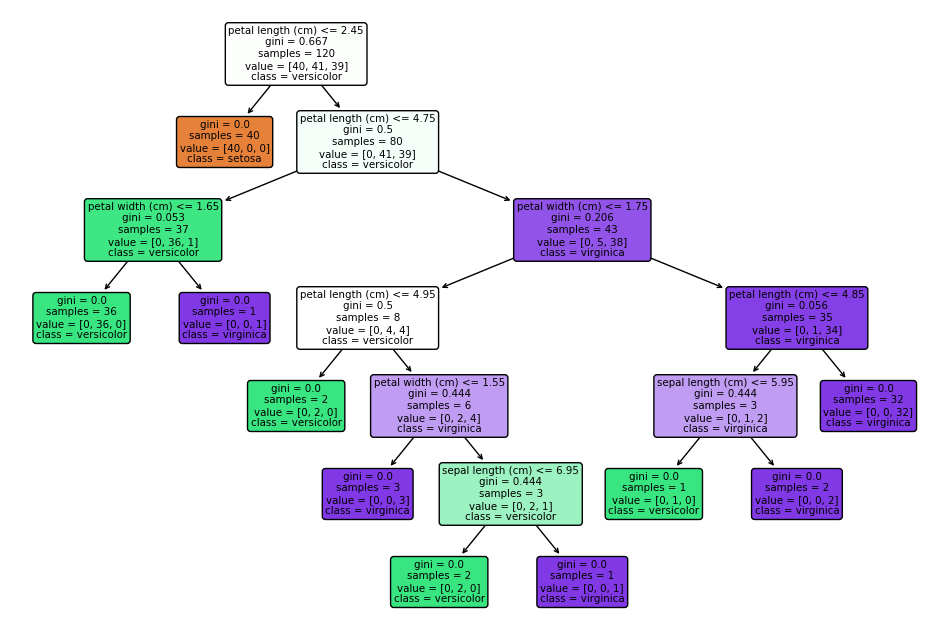

In [32]:
# Visualizar el árbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(12, 8))
plot_tree(modelo_arbol, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

In [33]:
# Simular un nuevo individuo con características específicas
nuevo_individuo = [[5.0, 3.5, 1.5, 0.2]]  # Ejemplo de características (sépalos y pétalos)

# Realizar la clasificación
prediccion = modelo_arbol.predict(nuevo_individuo)

# Obtener el nombre de la clase predicha
clase_predicha = iris.target_names[prediccion[0]]

# Mostrar la predicción
print(f"El nuevo individuo se clasifica como: {clase_predicha}")


El nuevo individuo se clasifica como: setosa
